In [10]:
# Standards
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.stem import WordNetLemmatizer

# Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split

**Please Note: EDA & Data Collection took place in Basic Modeling Notebook**

In [2]:
# import data for subreddits
all_posts = pd.read_csv('./data/all.csv', index_col=[0], keep_default_na=False)
all_posts.head()

,title,created_utc,selftext,subreddit,author,media_only,permalink
0,Being rude and selfish does not help career pr...,1598916128,,science,HigherEdAvenger,False,/r/science/comments/ik91e0/being_rude_and_self...
1,How NASA and Chandrayaan discovered water on t...,1598911189,,science,7rillionaire,False,/r/science/comments/ik7lte/how_nasa_and_chandr...
2,Microbiome Analysis: Which Microbiome test is ...,1598911170,,science,Baron_ess,False,/r/science/comments/ik7lls/microbiome_analysis...
3,Study suggests religious belief does not confl...,1598910315,,science,CremationLily,False,/r/science/comments/ik7cfe/study_suggests_reli...
4,Space telescope using the Earth atmosphere as ...,1598910274,,science,KindlySecret8,False,/r/science/comments/ik7byl/space_telescope_usi...


In [49]:
all_posts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 99
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        10000 non-null  object
 1   created_utc  10000 non-null  int64 
 2   selftext     10000 non-null  object
 3   subreddit    10000 non-null  object
 4   author       10000 non-null  object
 5   media_only   10000 non-null  bool  
 6   permalink    10000 non-null  object
dtypes: bool(1), int64(1), object(5)
memory usage: 556.6+ KB


In [50]:
all_posts.isna().sum()

title          0
created_utc    0
selftext       0
subreddit      0
author         0
media_only     0
permalink      0
dtype: int64

In [210]:
# wanted to check the latest my data was collected
all_posts.nlargest(n = 2, columns=['created_utc'])

,title,created_utc,selftext,subreddit,author,media_only,permalink
0,Mozilla research: Browsing histories are uniqu...,1598916394,,technology,janjinx,False,/r/technology/comments/ik94cu/mozilla_research...
0,Being rude and selfish does not help career pr...,1598916128,,science,HigherEdAvenger,False,/r/science/comments/ik91e0/being_rude_and_self...


In [209]:
# wanted to check the earliest my data was collected
all_posts.nsmallest(n = 2, columns=['created_utc'])

,title,created_utc,selftext,subreddit,author,media_only,permalink
99,A Combination of Ivermectin and Doxycycline Po...,1594317775,,science,TrumpLyftAlles,False,/r/science/comments/ho7x00/a_combination_of_iv...
98,Growth failure in preterm infants tied to alte...,1594317786,,science,InfinityB_mc,False,/r/science/comments/ho7x3i/growth_failure_in_p...


In [3]:
X = all_posts['title']
y = all_posts['subreddit']

In [4]:
X.shape

(10000,)

In [5]:
y.shape

(10000,)

In [6]:
# Baseline accuracy; don't have to stratify 
y.value_counts(normalize=True)

science       0.5
technology    0.5
Name: subreddit, dtype: float64

In [7]:
y = np.where(y == 'science', 1, 0)
y

array([1, 1, 1, ..., 0, 0, 0])

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=151)

In [12]:
# instantiate the Lemmatizer
lem = WordNetLemmatizer()
X_train_lem = [lem.lemmatize(i) for i in X_train]
X_test_lem = [lem.lemmatize(i) for i in X_test]

In [13]:
# Instantiate a CountVectorizer.
cvec = CountVectorizer(stop_words='english', ngram_range=[1, 4])

In [14]:
# Fit and transform the vectorizer on the training data
X_train_cvec = cvec.fit_transform(X_train, y_train)

In [15]:
# transform testing data
X_test_cvec = cvec.transform(X_test)

In [16]:
# Convert X_train into a DataFrame
X_train_df = pd.DataFrame(X_train_cvec.toarray(),
                          columns=cvec.get_feature_names())

MemoryError: Unable to allocate 10.1 GiB for an array with shape (7500, 180170) and data type int64

In [86]:
# got code from lesson 5.05-NLP-II

# get count of top-occurring words

# empty dictionary
top_words = {}

# loop through columns
for i in X_train_df.columns:
    
    # save sum of each column in dictionary
    top_words[i] =  X_train_df[i].sum()
    
# top_words to dataframe sorted by highest occurance
most_freq = pd.DataFrame(sorted(top_words.items(), key = lambda x: x[1], reverse = True))

# View most frequent words dataframe
most_freq_df = pd.DataFrame(most_freq)

In [86]:
most_freq_df.head(10)

,0,1
0,new,839
1,study,619
2,covid,520
3,19,498
4,covid 19,491
5,scientists,274
6,people,245
7,researchers,243
8,new study,229
9,research,210


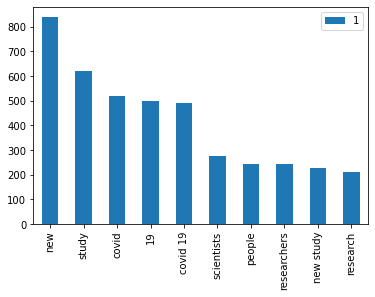

In [63]:
# got code from lesson 5.05-NLP-II
# visualize top 10 words
most_freq_df.nlargest(10, 1).plot(kind = 'bar')
plt.xticks([i for i in range(10)], [col for col in most_freq_df.nlargest(10, 1)[0]]);

### First Contender: TfidfVectorizer + Naive Bayes

In [17]:
tvec =TfidfVectorizer(stop_words='english')

In [18]:
X_train_tvec = tvec.fit_transform(X_train)

In [19]:
X_test_tvec = tvec.transform(X_test)

In [20]:
df = pd.DataFrame(X_train_tvec.toarray(),
                  columns=tvec.get_feature_names())

In [68]:
# got code from lesson 5.05-NLP-II

# get count of top-occurring words

# empty dictionary
top_words2 = {}

# loop through columns
for i in df.columns:
    # save sum of each column in dictionary
    top_words2[i] =  df[i].sum()
    
# top_words to dataframe sorted by highest occurance
most_freq1 = pd.DataFrame(sorted(top_words2.items(), key = lambda x: x[1], reverse = True))

# View most frequent words dataframe
most_freq_df1 = pd.DataFrame(most_freq1)

In [95]:
most_freq_df1.head(20)

,0,1
0,new,104.578218
1,covid,78.752342
2,study,76.764898
3,19,75.226187
4,apple,49.853385
5,scientists,47.421230
6,facebook,45.947849
7,help,44.623066
8,market,43.565004
9,google,41.038596


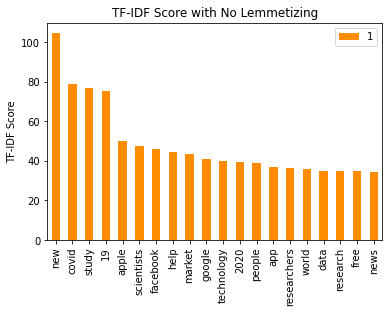

<Figure size 3600x3600 with 0 Axes>

In [120]:
# got code from lesson 5.05-NLP-II
# visualize top 10 words

#plt.figure(figsize=(50, 50));
most_freq_df1.nlargest(20, 1).plot(kind = 'bar', color = 'darkorange');
plt.xticks([i for i in range(20)], [col for col in most_freq_df1.nlargest(20, 1)[0]]);
plt.title('TF-IDF Score with No Lemmetizing');
plt.ylabel('TF-IDF Score');
plt.figure(figsize=(50, 50));

In [21]:
nbayes_tvec = MultinomialNB()

In [22]:
nbayes_tvec.fit(X_train_tvec, y_train)

MultinomialNB()

In [23]:
nbayes_tvec.score(X_train_tvec, y_train)

0.9581333333333333

In [24]:
nbayes_tvec.score(X_test_tvec, y_test)

0.8936

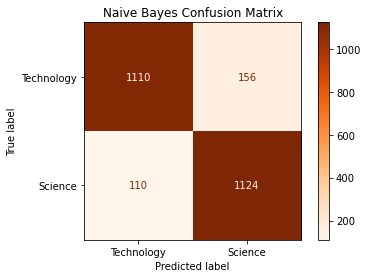

In [25]:
plot_confusion_matrix(nbayes_tvec, X_test_tvec, y_test, cmap='Oranges', values_format='d', display_labels=['Technology', 'Science']);
plt.title('Naive Bayes Confusion Matrix');

### Second Contender: Lemmetizer + Tfidf Vectorizer + Logistic Regression

In [26]:
log_r_tvec = LogisticRegression()

In [27]:
tvec2 = TfidfVectorizer(max_df=0.9, max_features=None, min_df=2, ngram_range=(1, 3), stop_words='english')

In [28]:
X_train_tvec_lem = tvec2.fit_transform(X_train_lem, y_train)
X_test_tvec_lem = tvec2.transform(X_test_lem)

In [29]:
df2 = pd.DataFrame(X_train_tvec_lem.toarray(),
                  columns=tvec2.get_feature_names())

In [79]:
# got code from lesson 5.05-NLP-II

# get count of top-occurring words

# empty dictionary
top_words3 = {}

# loop through columns
for i in df2.columns:
    # save sum of each column in dictionary
    top_words3[i] =  df2[i].sum()
    
# top_words to dataframe sorted by highest occurance
most_freq2 = pd.DataFrame(sorted(top_words3.items(), key = lambda x: x[1], reverse = True))

# View most frequent words dataframe
most_freq_df2 = pd.DataFrame(most_freq2)

In [126]:
most_freq_df2.head(20)

,0,1
0,new,88.502039
1,covid,64.724618
2,study,64.703525
3,19,61.295692
4,covid 19,60.752184
5,help,43.053859
6,apple,42.702752
7,facebook,40.545362
8,scientists,40.480933
9,technology,38.919906


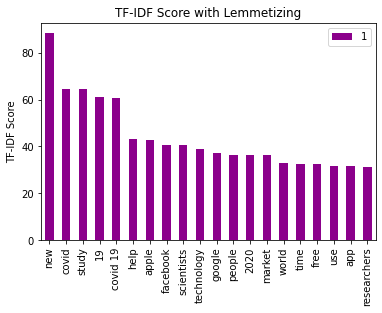

<Figure size 3600x3600 with 0 Axes>

In [127]:
# got code from lesson 5.05-NLP-II
# visualize top 10 words
most_freq_df2.nlargest(20, 1).plot(kind = 'bar', color = 'darkmagenta')
plt.xticks([i for i in range(20)], [col for col in most_freq_df2.nlargest(20, 1)[0]]);
plt.title('TF-IDF Score with Lemmetizing');
plt.ylabel('TF-IDF Score');
plt.figure(figsize=(50, 50));

In [30]:
log_r_tvec.fit(X_train_tvec_lem, y_train)

LogisticRegression()

In [31]:
log_r_tvec.score(X_test_tvec_lem, y_test)

0.8936

In [32]:
log_r_tvec.score(X_train_tvec_lem, y_train)

0.9586666666666667

Text(0.5, 1.0, 'Logistic Regression Confusion Matrix')

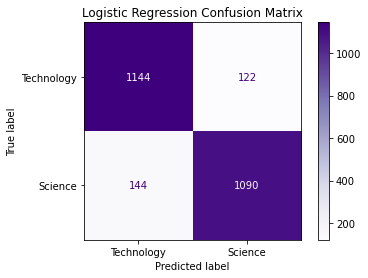

In [33]:
plot_confusion_matrix(log_r_tvec, X_test_tvec_lem, y_test, cmap='Purples', values_format='d', display_labels=['Technology', 'Science']);
plt.title('Logistic Regression Confusion Matrix')

In [34]:
log_coef_tvec_df = pd.DataFrame(data = log_r_tvec.coef_, columns=tvec2.get_feature_names()).T

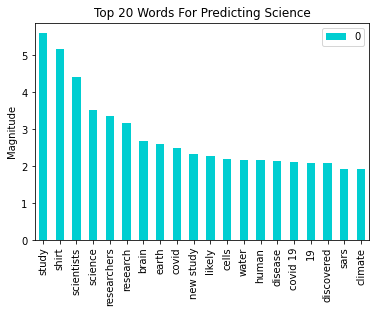

<Figure size 3600x3600 with 0 Axes>

In [35]:
# higher coefficients mean that a post is more likely to be from the science subreddit
log_coef_tvec_df.nlargest(20, 0).plot(kind='bar', color = 'darkturquoise')
plt.title('Top 20 Words For Predicting Science');
plt.ylabel('Magnitude');
plt.figure(figsize=(50, 50));

**Interesting that 'shirt' is a word that predicts a post falling into the science subreddit. Will explore more below.**

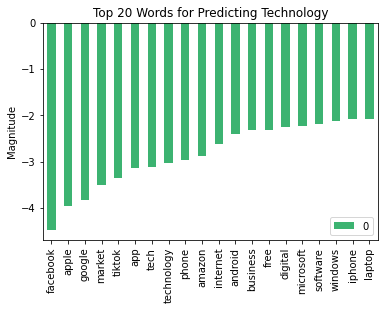

<Figure size 3600x3600 with 0 Axes>

In [36]:
# lower coefficients mean that a post is more likely to be from the technology subreddit
log_coef_tvec_df.nsmallest(20, 0).plot(kind='bar', color = 'mediumseagreen')
plt.title('Top 20 Words for Predicting Technology');
plt.ylabel('Magnitude');
plt.figure(figsize=(50, 50));

**Interesting that 'free' is a word that predicts a post falling into the technology subreddit. Will explore more below.**

In [37]:
science_posts = pd.read_csv('./data/science.csv', index_col=[0], keep_default_na=False)

In [40]:
# count of how many times shirt appears in science titles
shirt_count = 0
for i in science_posts['title']:
    for e in i.split(' '):
        if e == 'shirt':
            shirt_count += 1
print(f'Count of the word shirt in science posts: {shirt_count}')

Count of the word shirt in science posts: 175


In [50]:
shirt_posts = []
for i in science_posts['title']:
    for e in i.split(' '):
        if e == 'shirt':
            shirt_posts.append(i)
shirt_posts

['“My dear Mr Manly Warringah Just A Girl In Love With Her Eagles Vintage Retro shirt . Duchemin!” he uncomfortably protested. #ManlyWarringahJustAGirlInLoveWithHerEaglesVintageRetroshirt',
 'They have a 5-minute recap for a high scoring game but did a 10-minute recap for the Browns winning 5-0 Never Mind The Witch Beware Of The Bull Terrier Halloween Moon shirt . so why is it between Dobbs and Rudolph on who gets cut….?',
 'Whether you’re a Important Weight Lifting Swoley Spirit Vintage Retro shirt .country girl at heart or simply love a good graphic tee, slip into from Grayson Threads for a simple touch of country style. #ImportantWeightLiftingSwoleySpiritVintageRetroshirt',
 'With the custom apparel I May Live In France But My Story Began In Sweden shirt . industry constantly growing and evolving, it may feel harder and harder to distinguish your brand. #IMayLiveInFranceButMyStoryBeganInSwedenshirt',
 'Cartoons That’s basically Motocross I Just Want To Go Riding And Ignore All My Ad

**Looks like the shirt posts in the science subreddit are mainly spam/advertisements**

In [52]:
tech_posts = pd.read_csv('./data/tech.csv', index_col=[0], keep_default_na=False)

In [55]:
shirt_count = 0
for i in tech_posts['title']:
    for e in i.split(' '):
        if e == 'shirt':
            shirt_count += 1
print(f'Count of the word shirt in science posts: {shirt_count}')

Count of the word shirt in science posts: 0


**Looks like the shirt spam/advertisements don't appear in the tech subreddit**

In [54]:
free_count = 0
for i in tech_posts['title']:
    for e in i.split(' '):
        if e == 'free':
            free_count += 1
print(f'Count of the word free in tech posts: {free_count}')

Count of the word free in tech posts: 33


In [56]:
free_posts = []
for i in tech_posts['title']:
    for e in i.split(' '):
        if e == 'free':
            free_posts.append(i)
free_posts

['Reliance JioFiber Unlimited Broadband plans announced: Starting from Rs 399 (5.44 USD) a month with speeds up to 300 Mbps and 30-day free trial',
 'Reliance JioFiber Unlimited Broadband plans announced: Starting from Rs 399 (5.44 $ USD) a month with speeds up to 150 Mbps and 30-day free trial',
 "Apple forced Facebook to delete a cautionary note stating that Apple takes a 30% cut of all revenue of from Facebook's free charity app aimed at helping Small Businesses through the Pandemic.",
 'T-Mobile is offering a free iPhone 11 Pro to new and existing subscribers',
 'Yooo free 5 usd on wish',
 'Yooo free 5 usd on wish',
 'Yooo free 5 usd on wish',
 'Man vs Machine. How will technology change the future jobs of frontline workers? Join us for an engaging online talk show with our host and expert guests. Just 3 weeks to go: Sep. 14th, 11am-12pm CEST More information and free registration:',
 'free electricity',
 'It’s Not Too Late to Save the Internet - The Trump administration has done e

**Looks like free posts are a mix of spam, event announcements and actual posts**